In [1]:
import netCDF4 as NC
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.core.display import Image
import datetime as dt


from salishsea_tools import (nc_tools,tidetools,viz_tools,stormtools)

%matplotlib inline

In [2]:
grid = NC.Dataset('/ocean/imachuca/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

In [4]:
tracers = NC.Dataset('/results/SalishSea/nowcast/early-days/4-10oct14/SalishSea_1h_20141004_20141010_grid_U.nc')
v=tracers.variables['vozocrtx']
v.shape

(168, 40, 898, 398)

In [5]:
lon112={};lat112={}
o112 = NC.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop1/12/ariane_trajectories_qualitative.nc','r')
lon112['model']=o112.variables['traj_lon']
lat112['model']=o112.variables['traj_lat']

In [14]:
def plotoct(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
    viz_tools.plot_coastline(ax1,grid,coords='map')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=4,color='DarkViolet')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=20,color='OrangeRed')
    ax1.set_xlim([-123.6,-123])
    ax1.set_ylim([48.8,49.4])
    colors=['g','DodgerBlue']
    for i, key in enumerate(lon.keys()):
        ax1.scatter(lon[key][1:,part],lat[key][1:,part],marker='o',color=colors[i],label=key)
        ax1.scatter(lon[key][0,part],lat[key][0,part],color='0.30',marker='s')
    ax1.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    ax1.set_xlim([-123.6,-123]); ax1.set_ylim([48.8,49.4])
    ax1.set_xticks([-123.6, -123.4, -123.2,-123])
    ax1.set_xticklabels([-123.6, -123.4, -123.2,-123])
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    ax1.legend()

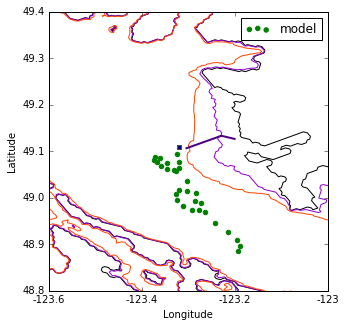

In [15]:
plotoct(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)